<a href="https://colab.research.google.com/github/cswcjt/Deep_Learning/blob/main/Conv_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import os
# os.cpu_count()
!nvidia-smi

Wed Nov 30 08:14:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import Libraries
import numpy as np
import tensorflow as tf

# import tensorflow layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [3]:
# Load Datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape) # 4차원 Tensor
## 32 x 32 x 3(RGB-channel) -> 이미지당 pixel 개수.
print(X_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Preprocessing

Input Normalization

In [4]:
# min-max scaling
# RGB, 3-channel color [0, 255]

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### Training with Vanilla CNN

**Model Architecture**

> Conv - Relu - Conv - Relu - FC - FC


In [7]:
# Sequential 객체를 이용하여 layer를 쌓아올려 모델을 만듭니다.
model = Sequential([
    Input(shape=(32, 32, 3)), 
    Conv2D(filters=6, # 필터의 개수
           kernel_size=3, # 커널의 한 변의 길이
           strides=1, # 몇 칸씩 움직일 것인지
           padding='same', # 원본의 shape을 유지 시켜준다. 
           activation='relu'),

    Conv2D(16, 5, 1, 'same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(1024/2, activation='relu'),
    Dense(1024/4, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         168       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                      

In [8]:
# training setup
from tensorflow.keras.optimizers import SGD, Adam

## config variables
batch_size = 128
lr = 1e-4
epochs = 15

# Set optimizer, loss function, metrics, callback function
optimizer = Adam(learning_rate=lr)

# categorical_crossentropy : target value가 이미 one-hot vector인 경우
# sparse_categorical_crossentropy : 그냥 정수

loss_fn = 'sparse_categorical_crossentropy' # multi-class classification
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)

In [9]:
# model training

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test), # 매 epoch마다 validation 성능 체크 가능!
                    verbose=2)

Epoch 1/15
391/391 - 12s - loss: 1.6982 - accuracy: 0.3947 - val_loss: 1.4312 - val_accuracy: 0.4921 - 12s/epoch - 31ms/step
Epoch 2/15
391/391 - 3s - loss: 1.3447 - accuracy: 0.5212 - val_loss: 1.3281 - val_accuracy: 0.5219 - 3s/epoch - 7ms/step
Epoch 3/15
391/391 - 3s - loss: 1.2098 - accuracy: 0.5717 - val_loss: 1.2054 - val_accuracy: 0.5647 - 3s/epoch - 7ms/step
Epoch 4/15
391/391 - 3s - loss: 1.1112 - accuracy: 0.6087 - val_loss: 1.1434 - val_accuracy: 0.5948 - 3s/epoch - 7ms/step
Epoch 5/15
391/391 - 3s - loss: 1.0282 - accuracy: 0.6386 - val_loss: 1.0827 - val_accuracy: 0.6191 - 3s/epoch - 7ms/step
Epoch 6/15
391/391 - 3s - loss: 0.9602 - accuracy: 0.6625 - val_loss: 1.0484 - val_accuracy: 0.6324 - 3s/epoch - 7ms/step
Epoch 7/15
391/391 - 3s - loss: 0.8999 - accuracy: 0.6868 - val_loss: 1.0302 - val_accuracy: 0.6406 - 3s/epoch - 8ms/step
Epoch 8/15
391/391 - 3s - loss: 0.8447 - accuracy: 0.7049 - val_loss: 1.0133 - val_accuracy: 0.6454 - 3s/epoch - 7ms/step
Epoch 9/15
391/391 - 

In [10]:
# evaluate
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Loss : %.4f, Accuracy : %.4f" % (loss, acc))

79/79 [==============================] - 0s 6ms/step - loss: 1.0074 - accuracy: 0.6801
Loss : 1.0074, Accuracy : 0.6801


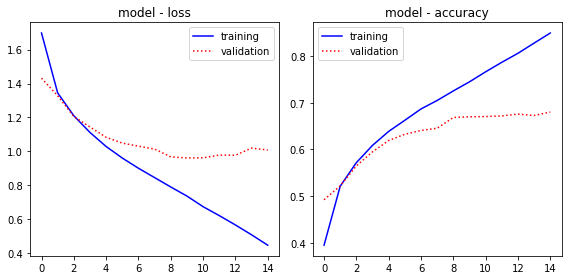

In [11]:
## loss visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1, 2,1)
plt.plot(history.history['loss'],'b-', label = "training")
plt.plot(history.history['val_loss'], 'r:', label = "validation")
plt.title("model - loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("model - accuracy")

plt.plot(history.history['accuracy'], 'b-', label = "training")
plt.plot(history.history['val_accuracy'], 'r:', label = "validation")

plt.legend()
plt.tight_layout()
plt.show()